In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statistics import mean
from os import chdir
chdir("/Users/pilot/Desktop/archive")

In [7]:
def draw(df, string):
    plt.figure(figsize=(10, 10))
    plt.title(string, fontsize=16)
    plt.xlabel("x", fontsize=16)
    plt.ylabel("y", fontsize=16)
    plt.scatter(df["x"], df["y"], alpha = 0.2)
    plt.plot()
    plt.show()

In [6]:
# removing empty rows
def clean(df):
    nan_value = float("NaN")
    df.replace("", nan_value, inplace=True)
    df.dropna(subset=["y"], inplace=True)

In [62]:
def slope_and_intercept(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)   
    slope = (mean_x * mean_y - mean (X * Y)) / ((mean_x**2) - mean(X**2))
    intercept = mean_y - (slope * mean_x)
    
    return slope, intercept

In [66]:
#to determine the best fit 
def r_squared(X,Y):
    n = len(X)
    total_sum_square = 0
    sum_square_residual = 0
    m,b = slope_and_intercept(X,Y)
    for i in range(n):
        y_pred = b + m * X[i]
        total_sum_square += (Y[i] - mean(Y))**2 
        sum_square_residual += (Y[i] - y_pred)**2 
    r2 = 1 - (sum_square_residual/total_sum_square)

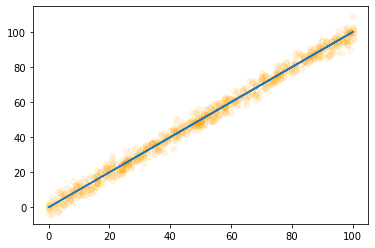

In [67]:
# Training Data
train = pd.read_csv("train.csv")
clean(train)
X_train = train["x"].values
Y_train = train["y"].values
m,b = slope_and_intercept(X_train,Y_train)

regression_line = [(m*x)+b for x in X_train]
r_squared(X_train,Y_train)
plt.scatter(X_train,Y_train,color = "orange", alpha = 0.1)
plt.plot(X_train, regression_line)
plt.show()


In [ ]:
# Testing Data
test = pd.read_csv("test.csv")
clean(test)
X_test = test["x"].values
Y_test = test["y"].values

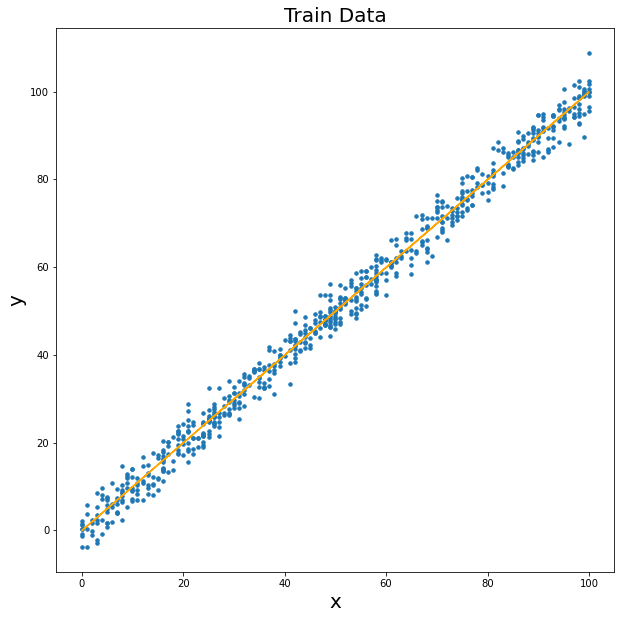

0.9888014444327563


In [74]:
#Linear Regression using Scikit
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Plotting using scikit
plt.figure(figsize=(10, 10))
plt.scatter(X_train, Y_train, s=12)
plt.plot(X_train, lin_reg.predict(X_train), color="orange")
plt.title("Train Data", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.show()

accuracy = lin_reg.score(X_test, Y_test)
print(accuracy)